# Imports:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sonipy.sonify import SonifyTool

print('done')

done


In [22]:
C4 = 261.6 # Hz

def plot_differential(arr, sensor_name, window_size, sigma=128, figsize=(30, 10), hourly=True):
    fig, axes = plt.subplots(3, 1, figsize=figsize)

    axes[0].plot(np.arange(arr.shape[0]), arr, c='b')
    axes[0].set_title('Raw data on 24 Hours')
    axes[0].set_ylabel(sensor_name)

    differential = list()
    for i in range(arr.shape[0] - 1):
        differential.append(arr[i + 1] - arr[i])
    differential = np.abs(np.array(differential))

    axes[1].plot(np.arange(differential.shape[0]), differential, c='b')
    axes[1].set_title('Differential on 24 Hours')
    axes[1].set_ylabel('d{} / dT'.format(sensor_name))

    filtered_differential = gaussian_filter1d(differential, sigma)
    axes[2].plot(np.arange(filtered_differential.shape[0]), filtered_differential, c='b')
    axes[2].set_title('Differential with Gaussian filter')
    axes[2].set_ylabel('d{} / dT'.format(sensor_name))

    if hourly:
        for ax in axes:
            ax.set_xticks(np.arange(start=0, stop=3600 * 24, step=3600))
            ax.set_xticklabels(np.array(['{}H'.format(x) for x in range(24)]))
    plt.show()
    return filtered_differential

def sonify(x, filename, frequency_min, frequency_max, duration_constraint=False, duration=5000, save=True):
    frequency_args = {
        'frequency_min' : frequency_min,
        'frequency_max' : frequency_max
    }

    duration_args = {
        'time_total' : duration, # ms
    }

    duration_scale = 1. / 5000. # x value / time (ms)

    Tone = SonifyTool(np.arange(x.shape[0]), x,
                        frequency_args = frequency_args,
                        duration_args = duration_args,
                    )
    Tone.play()
    if save:
        Tone.save('.', filename)
    return Tone

In [23]:
df = pd.read_csv('./SWaT.Dataset/SWaT_Dataset_Attack_v0.csv', sep=';')
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
data.describe()

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


count    449919.000000
mean        607.019897
std         125.303001
min         189.826294
25%         510.011108
50%         530.422485
75%         727.432129
max         925.032288
Name: LIT101, dtype: float64

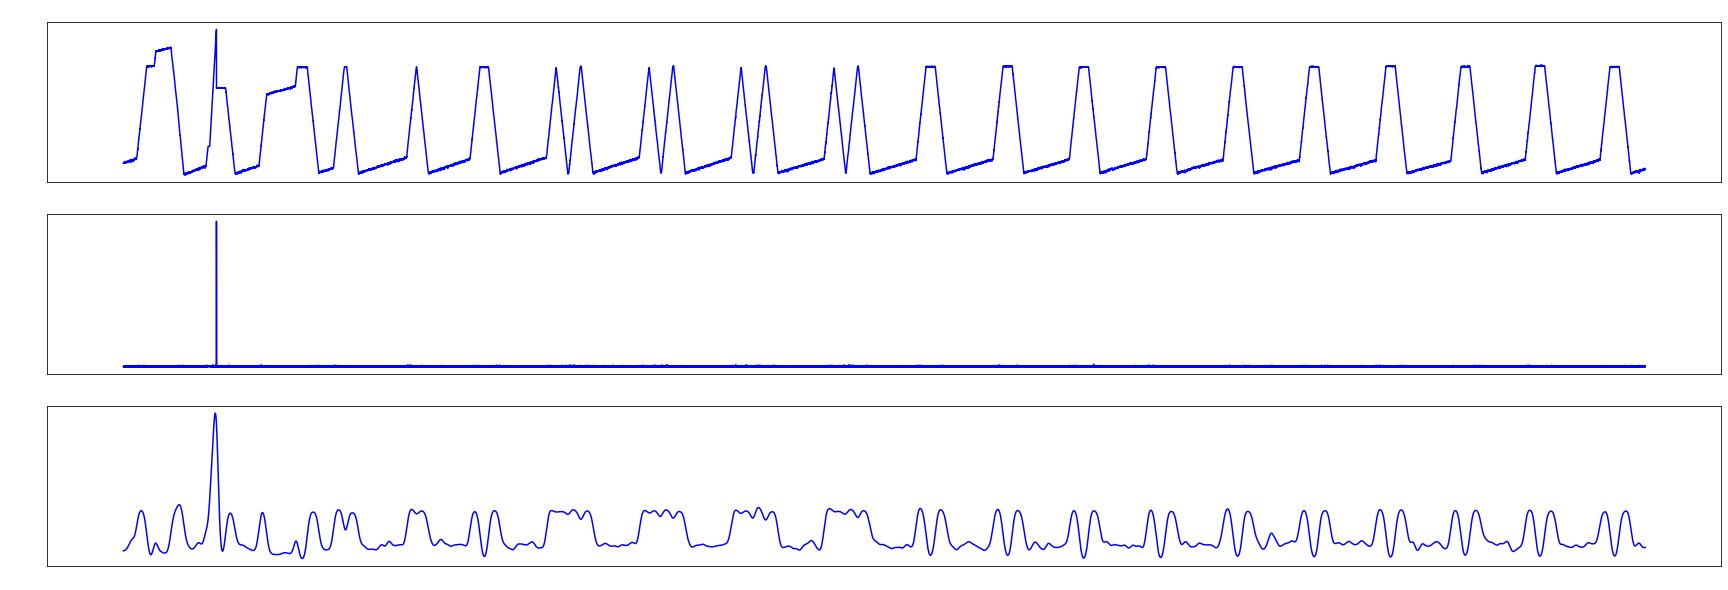

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LIT101_24H_Differential.wav
Saved multitone as .\tones/LIT101_24H_Differential.wav.


In [16]:
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
signal = plot_differential(data.values[: 3600 * 24], 'LIT-101', 500)
Tone = sonify(signal, 'LIT101_24H_Differential.wav', C4, C4 * 10, duration_constraint=True, duration=30000, save=True)

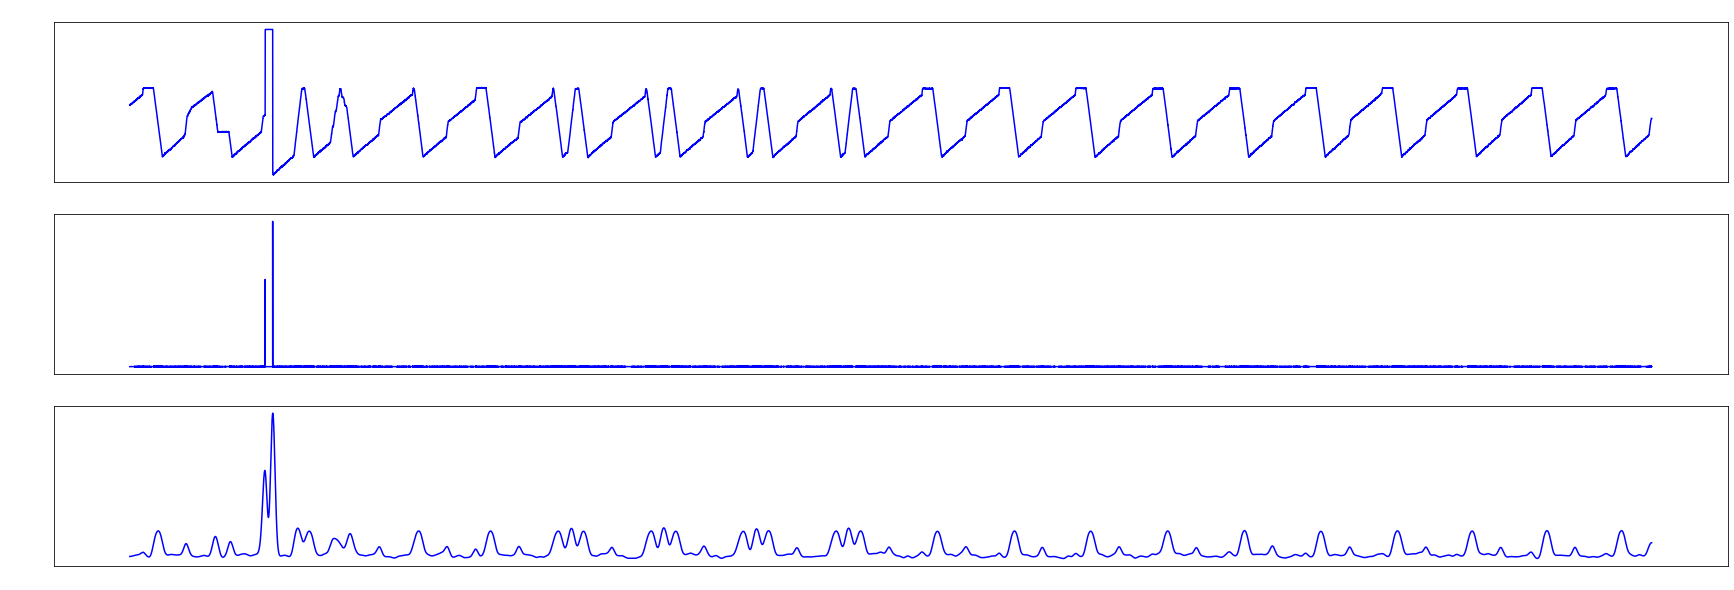

array([0.19351164, 0.19351205, 0.19351283, ..., 0.32345438, 0.3234609 ,
       0.32346424], dtype=float32)

In [20]:
data = df['LIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
plot_differential(data.values[: 3600 * 24], 'LIT301', 1000)

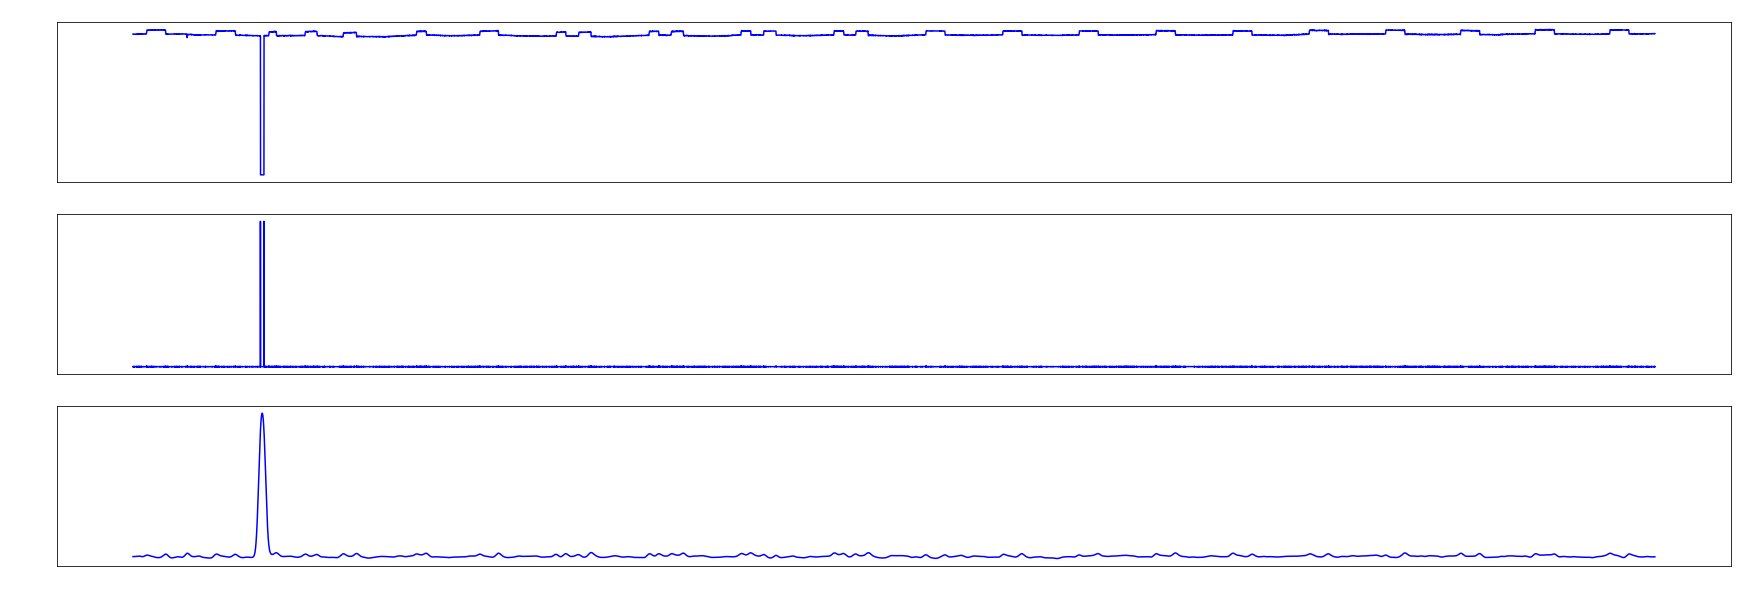

array([0.00018471, 0.00018471, 0.00018471, ..., 0.00016833, 0.00016833,
       0.00016833], dtype=float32)

In [21]:
data = df['AIT202'].apply(lambda x: x.replace(',', '.')).astype('float32')
plot_differential(data.values[: 3600 * 24], 'AIT202', 1000)